# Assignment 2: Predict the Rating of Movies Extracted from the TMDB Database.

### Name: Luxi Bai
### ID: 1527822

# 1 Read Data and Prepare for next Steps

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import scipy
from scipy.sparse import vstack
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.metrics import log_loss

In [2]:
# read files
train = pd.read_csv("A2-Data_files/TMDB_train.csv")
evaluate = pd.read_csv("A2-Data_files/TMDB_evaluate.csv")
test = pd.read_csv("A2-Data_files/TMDB_test.csv")
unlabelled = pd.read_csv("A2-Data_files/TMDB_unlabelled.csv")


no_text_features = ['release_year','runtime','budget','revenue','adult','original_language','popularity',
                        'genre_Action','genre_Adventure','genre_Animation','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
                        'genre_Fantasy','genre_History','genre_Horror','genre_Music','genre_Mystery','genre_Romance','genre_Science Fiction',
                        'genre_TV Movie','genre_Thriller','genre_War','genre_Western','product_of_Canada','product_of_France','product_of_Germany',
                        'product_of_India','product_of_Italy','product_of_Japan','product_of_Spain','product_of_UK','product_of_USA','product_of_other_countries',
                        'vote_count']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34056\3187181068.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  unlabelled = pd.read_csv("A2-Data_files/TMDB_unlabelled.csv")


In [3]:
# change feature "original_language" from text feature to numeric feature
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['original_language'].to_list() + evaluate['original_language'].to_list() + test['original_language'].to_list())

# print(encoder.classes_)
train['original_language'] = encoder.transform(train['original_language'])
evaluate['original_language'] = encoder.transform(evaluate['original_language'])
test['original_language'] = encoder.transform(test['original_language'])

# check the shape of three datasets
print(train.shape)
print(evaluate.shape)
print(test.shape)
# print(unlabelled.shape)

(100000, 44)
(20000, 44)
(20000, 42)


# 2 Train and Evaluate Supervised Methods of RF, MLP and KNN

### 2.1 Define a function to train and evaluate three supervised models

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define a function to train and evaluate three supervised models
def test_diff_cls(x_train, y_train, x_eval, y_eval):
    classifiers = {
        "Random Forest": RandomForestClassifier(n_estimators=180, max_features="log2", n_jobs=-1, random_state=700, oob_score=True), # n_estimators=180, max_features=20, max_depth=30, min_samples_leaf=9,
        "Multi-Layer Perceptron": MLPClassifier(max_iter=100,hidden_layer_sizes=100, random_state=1000),  # hidden_layer_sizes defualt=100,max_iter=200
        "KNN": KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree", n_jobs=-1)   # algorithm:auto\ball_tree\kd_tree\brute,default=auto
    }
    

    for name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred_eval = classifier.predict(x_eval)

        accuracy_eval = accuracy_score(y_eval, y_pred_eval)
        precision_eval = precision_score(y_eval, y_pred_eval, average="macro")
        recall_eval = recall_score(y_eval, y_pred_eval, average="macro")
        f1_eval = f1_score(y_eval, y_pred_eval, average="macro")

        print("===========================================================")
        print(f"{name} :")
        print(f"    Accuracy: {accuracy_eval}")
        print(f"    precision: {precision_eval}")
        print(f"    recall: {recall_eval}")
        print(f"    f1: {f1_eval}")
        print("===========================================================")

### 2.2 The Training Result of Non Text Feature

In [5]:
X_train_without_text = train[no_text_features]
y_train_rating = train['average_rate']
y_train_cate = train['rate_category']

X_eval_without_text = evaluate[no_text_features]
y_eval_rating = evaluate['average_rate']
y_eval_cate = evaluate['rate_category']

X_test_without_text = test[no_text_features]

In [6]:
test_diff_cls(X_train_without_text, y_train_cate, X_eval_without_text, y_eval_cate)

Random Forest :
    Accuracy: 0.69255
    precision: 0.6995095907746968
    recall: 0.6788601737294879
    f1: 0.6870389755897216


d:\Python\python3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron :
    Accuracy: 0.33115
    precision: 0.3174208994631766
    recall: 0.2719471040506279
    f1: 0.2565546468931361
KNN :
    Accuracy: 0.4181
    precision: 0.4094856063783501
    recall: 0.3952888998071618
    f1: 0.39455472190823593


### 2.3 The Training Result of BoW

In [7]:
import scipy
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/train_concat_bow.npz')
X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/eval_concat_bow.npz')

In [8]:
test_diff_cls(X_train_text_concat, y_train_cate, X_eval_text_concat, y_eval_cate)

Random Forest :
    Accuracy: 0.64825
    precision: 0.8013241880455929
    recall: 0.6024715773554612
    f1: 0.6575321283506254


d:\Python\python3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\python3.12.2\Lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Multi-Layer Perceptron :
    Accuracy: 0.54715
    precision: 0.5297004133987068
    recall: 0.5248951961901245
    f1: 0.5270713562801443
KNN :
    Accuracy: 0.34355
    precision: 0.3271160094571895
    recall: 0.30418798473118425
    f1: 0.30103968982012047


### 2.4 The Training Result of TF-IDF

In [9]:
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/train_concat_tfidf.npz')
X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/eval_concat_tfidf.npz')

In [10]:
test_diff_cls(X_train_text_concat, y_train_cate, X_eval_text_concat, y_eval_cate)

Random Forest :
    Accuracy: 0.6458
    precision: 0.8060328520524579
    recall: 0.6009310025549893
    f1: 0.6575106383795429


d:\Python\python3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\python3.12.2\Lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Multi-Layer Perceptron :
    Accuracy: 0.5222
    precision: 0.5114002306814585
    recall: 0.5070853152211016
    f1: 0.5087908398149513
KNN :
    Accuracy: 0.35675
    precision: 0.3409384659864582
    recall: 0.32321211803758604
    f1: 0.3231807757386523


### 2.5 The Training Result of All Features (Text and Non-text)

In [11]:
import numpy as np
X_train_all = np.concatenate(( X_train_text_concat.toarray(), X_train_without_text.to_numpy()), axis=1)
X_eval_all = np.concatenate(( X_eval_text_concat.toarray(), X_eval_without_text.to_numpy()), axis=1)

In [12]:
test_diff_cls(X_train_all, y_train_cate, X_eval_all, y_eval_cate)

Random Forest :
    Accuracy: 0.67535
    precision: 0.7718367954016309
    recall: 0.6371711094052491
    f1: 0.677376999819599


d:\Python\python3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron :
    Accuracy: 0.3558
    precision: 0.36621805962910664
    recall: 0.32662449824915385
    f1: 0.29389458687452935
KNN :
    Accuracy: 0.4173
    precision: 0.40843002935912703
    recall: 0.39450317560560905
    f1: 0.3938926542659717


# 3 Baseline models of Zero-R and Random

### 3.1 Zero-R

In [13]:
from sklearn.dummy import DummyClassifier

ZEROclf = DummyClassifier(strategy="most_frequent")
ZEROclf.fit(X_train_all, y_train_cate)

y_pred_eval = ZEROclf.predict(X_eval_all)


print("Zero Rule baseline")
print(classification_report(y_eval_cate, y_pred_eval))

Zero Rule baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.00      0.00      0.00      5119
           3       0.27      1.00      0.43      5420
           4       0.00      0.00      0.00      2791
           5       0.00      0.00      0.00      1657

    accuracy                           0.27     20000
   macro avg       0.05      0.17      0.07     20000
weighted avg       0.07      0.27      0.12     20000



d:\Python\python3.12.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\python3.12.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\python3.12.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 3.2 Random

In [14]:
RANDOMclf = DummyClassifier(strategy="uniform")

RANDOMclf.fit(X_train_all, y_train_cate)
y_pred_eval = RANDOMclf.predict(X_eval_all)


print("Random baseline")
print(classification_report(y_eval_cate, y_pred_eval))

random_scores = []
for _ in range(10):
    RANDOMclf.fit(X_train_all, y_train_cate)
    random_scores.append(RANDOMclf.score(X_eval_all, y_eval_cate))
print("Random baseline accuracy", sum(random_scores) / 10.)

Random baseline
              precision    recall  f1-score   support

           0       0.10      0.16      0.12      2184
           1       0.14      0.16      0.15      2829
           2       0.25      0.16      0.20      5119
           3       0.25      0.16      0.20      5420
           4       0.14      0.17      0.16      2791
           5       0.08      0.17      0.11      1657

    accuracy                           0.16     20000
   macro avg       0.16      0.16      0.16     20000
weighted avg       0.19      0.16      0.17     20000

Random baseline accuracy 0.16645000000000001


# 4 Feature Selection

Select best top N non-text features, and result shows that more features make better model. Therefore, all features are necessary.

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=180, max_features="log2", n_jobs=-1, random_state=700),  # n_estimators de=100
    "Multi-Layer Perceptron": MLPClassifier(max_iter=100,hidden_layer_sizes=100, random_state=1000),  # hidden_layer_sizes defualt=100,max_iter=200
    "KNN": KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree", n_jobs=-1)   # algorithm:auto\ball_tree\kd_tree\brute,default=auto
}

# Define the number of features to select
k_values = [40, 30, 20, 10, 5,3,1]

for k in k_values:
    print(f"\nTop {k} Features:")
    
    # Initialize SelectKBest with ANOVA F-value as the scoring function
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    
    # Fit selector to training data and transform X1_train
    # X1_train_selected = selector.fit_transform(X_train_without_text, y_train_cate)  # X_train_without_pred
    X1_train_selected = selector.fit_transform(X_train_without_text, y_train_cate)
    
    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_feature_names = X_train_without_text.columns[selected_feature_indices]
    print("Selected Features:", selected_feature_names)
    
    # Evaluate classifiers using the selected features
    for name, classifier in classifiers.items():
        # Train classifier on selected features
        classifier.fit(X1_train_selected, y_train_cate)
        
        # Transform X1_test using the same selected features
        # X1_test_selected = X_eval_without_text.iloc[:, selected_feature_indices]
        X1_test_selected = selector.transform(X_eval_without_text)
        
        # Predict labels for X1_test
        y_pred = classifier.predict(X1_test_selected)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_eval_cate, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")



Top 40 Features:
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult',
       'original_language', 'popularity', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'product_of_Canada', 'product_of_France',
       'product_of_Germany', 'product_of_India', 'product_of_Italy',
       'product_of_Japan', 'product_of_Spain', 'product_of_UK',
       'product_of_USA', 'product_of_other_countries', 'vote_count'],
      dtype='object')
Random Forest Accuracy: 0.6925
Multi-Layer Perceptron Accuracy: 0.3311
KNN Accuracy: 0.4181

Top 30 Features:
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult',
       'original_language', 'popula

# 5 Self Training with RF, MLP and KNN on All featues, BoW and TFIDF

### 5.1 Pre-process unlabelled data because of some abnormal values

In [16]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

unlabelled = pd.read_csv("A2-Data_files/TMDB_unlabelled.csv")

unlabelled['release_year'] = unlabelled['release_year'].astype(str)

def extract_year1(date_str):
    try:
        return str(datetime.strptime(date_str, "%d/%m/%Y").year)
    except ValueError:
        return date_str  

def extract_year2(date_str):
    try:
        return str(datetime.strptime(date_str, "%Y-%m-%d").year)
    except ValueError:
        return date_str 

vectorized_extract_year1 = np.vectorize(extract_year1)
vectorized_extract_year2 = np.vectorize(extract_year2)
unlabelled['release_year'] = vectorized_extract_year1(unlabelled['release_year'])
unlabelled['release_year'] = vectorized_extract_year2(unlabelled['release_year'])
unlabelled['release_year'].astype("int")

0         1979
1         1979
2         1928
3         1979
4         2010
          ... 
254696    2012
254697    2015
254698    2012
254699    2013
254700    1977
Name: release_year, Length: 254701, dtype: int32

### 5.2 Prepare training datasets of TFIDF/BoW/All features

In [17]:
# TFIDF
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/train_concat_tfidf.npz')
X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/eval_concat_tfidf.npz')
X_unlabel_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/unlabelled_concat_tfidf.npz')

# BoW
# X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/train_concat_bow.npz')
# X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/eval_concat_bow.npz')
# X_unlabel_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/unlabelled_concat_bow.npz')

# All features
# X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/train_concat_tfidf.npz')
# X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/eval_concat_tfidf.npz')
# X_unlabel_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/unlabelled_concat_tfidf.npz')
# encoder = LabelEncoder()
# encoder.fit(train['original_language'].to_list() + evaluate['original_language'].to_list() + test['original_language'].to_list() + unlabelled['original_language'].to_list())
# unlabelled['original_language'] = encoder.transform(unlabelled['original_language'])

# X_unlabel_without_text = unlabelled[no_text_features] # original_language

# X_train_all = np.concatenate(( X_train_text_concat.toarray(), X_train_without_text.to_numpy()), axis=1)
# X_eval_all = np.concatenate(( X_eval_text_concat.toarray(), X_eval_without_text.to_numpy()), axis=1)
# X_unlabel_all = np.concatenate(( X_unlabel_text_concat.toarray(), X_unlabel_without_text.to_numpy()), axis=1)  # (254701, 1037)

In [19]:
from scipy.sparse import vstack
# Bow and TFIDF
all_used_data = vstack([X_train_text_concat, X_unlabel_text_concat])
all_used_label = y_train_cate.to_list() + [-1] * (X_unlabel_text_concat.shape[0])
print(len(all_used_label), all_used_data.shape, X_train_text_concat.shape)

# All features
# all_used_data = np.concatenate((X_train_all, X_unlabel_all), axis=0)
# all_used_label = y_train_cate.to_list() + [-1] * (X_unlabel_all.shape[0])
# print(len(all_used_label), all_used_data.shape, X_train_all.shape)
# all_used_data.shape

354701 (354701, 1000) (100000, 1000)


### 5.3 Define a self-learning function for three models: RF/MLP/KNN

In [20]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# the function to train these three models
def self_train_cls(x_train, y_train, x_eval, y_eval):
    classifiers = {
        "Random Forest": RandomForestClassifier(n_estimators=180, max_features="log2", n_jobs=-1, random_state=700),  # n_estimators de=100
        "Multi-Layer Perceptron": MLPClassifier(max_iter=100,hidden_layer_sizes=100, random_state=1000),  # hidden_layer_sizes defualt=100,max_iter=200
        "KNN": KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree", n_jobs=-1)   # algorithm:auto\ball_tree\kd_tree\brute,default=auto
    }
    

    for name, classifier in classifiers.items():
        # self_training_model = SelfTrainingClassifier(classifier, criterion='k_best', k_best=10000)
        self_training_model = SelfTrainingClassifier(classifier, criterion='k_best', k_best=1000)
        self_training_model.fit(x_train, y_train)
        valid_pred = self_training_model.predict(x_eval)

        accuracy_eval = accuracy_score(y_eval, valid_pred)
        precision_eval = precision_score(y_eval, valid_pred, average="macro")
        recall_eval = recall_score(y_eval, valid_pred, average="macro")
        f1_eval = f1_score(y_eval, valid_pred, average="macro")

        print("===========================================================")
        print(f"Self Training (Semi supervised Learning) of {name} :")
        print(f"    Accuracy: {accuracy_eval}")
        print(f"    precision: {precision_eval}")
        print(f"    recall: {recall_eval}")
        print(f"    f1: {f1_eval}")
        print("===========================================================")

### 5.4 Train models

In [21]:
# BoW and TFIDF
self_train_cls(all_used_data, all_used_label, X_eval_text_concat, y_eval_cate)

# All features
# self_train_cls(all_used_data, all_used_label, X_eval_all, y_eval_cate)

Self Training (Semi supervised Learning) of Random Forest :
    Accuracy: 0.64955
    precision: 0.8089081765957991
    recall: 0.6028244582954366
    f1: 0.6589450425994513
Self Training (Semi supervised Learning) of Multi-Layer Perceptron :
    Accuracy: 0.52495
    precision: 0.5132096663626527
    recall: 0.5075131492777252
    f1: 0.5098511714923848
Self Training (Semi supervised Learning) of KNN :
    Accuracy: 0.35385
    precision: 0.3379817095084406
    recall: 0.3235416109611326
    f1: 0.32208262267403404


# 6 Get Kaggle submission file test_predictions*.csv

According to the experiments above, I finally choose RF as the best model to submit on Kaggle. Here I package it as a CSV file for submission.

In [42]:
X_train_without_text = train[no_text_features]
y_train_rating = train['average_rate']
y_train_cate = train['rate_category']

X_eval_without_text = evaluate[no_text_features]
y_eval_rating = evaluate['average_rate']
y_eval_cate = evaluate['rate_category']

X_test_without_text = test[no_text_features]

In [43]:
# test
X_test_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/test_concat_tfidf.npz')
# BoW
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/TMDB_text_features_bow/train_concat_bow.npz')
# TFIDF
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/TMDB_text_features_tfidf/train_concat_tfidf.npz')

X_train_all = np.concatenate(( X_train_text_concat.toarray(), X_train_without_text.to_numpy()), axis=1)
X_test_all = np.concatenate(( X_test_text_concat.toarray(), X_test_without_text.to_numpy()), axis=1)

Train RF model for submission

In [46]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# RFclf = RandomForestClassifier(n_estimators=180, max_features="log2", random_state=700)
MLPclf = MLPClassifier(max_iter=100,hidden_layer_sizes=100, random_state=1000)  # hidden_layer_sizes defualt=100,max_iter=200
# RFclf = KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree", n_jobs=-1)   # algorithm:auto\ball_tree\kd_tree\brute,default=auto

# RFclf.fit(X_train_all, y_train_cate)  # 0.66766
MLPclf.fit(X_train_text_concat, y_train_cate) # 0.64666
# RFclf.fit(X_train_without_text, y_train_cate)  # 0.68533

# y_pred_test = RFclf.predict(X_test_all)
y_pred_test = MLPclf.predict(X_test_text_concat)
# y_pred_test = RFclf.predict(X_test_without_text)


assert test.shape[0] == len(y_pred_test)
test["rate_category"] = y_pred_test

print(classification_report(y_eval_cate, y_pred_test))


              precision    recall  f1-score   support

           0       0.11      0.10      0.11      2184
           1       0.14      0.14      0.14      2829
           2       0.26      0.26      0.26      5119
           3       0.27      0.27      0.27      5420
           4       0.14      0.15      0.15      2791
           5       0.08      0.08      0.08      1657

    accuracy                           0.20     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.20      0.20      0.20     20000



Save as a file

In [47]:
test_out = test[["id", "rate_category"]]
test_out.to_csv('Kaggle_Supervised_MLP.csv', index=False)

## 7 RF Model tuning for RF
n_estimators, max_feature, max_depth, min_sample_leaf

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import log_loss

# # tuned_parameters = range(10, 200, 10)  # n_estimators=180
# # tuned_parameters = range(5, 40, 5)  # max_features=20
# # tuned_parameters = range(10, 100, 10)  # max_depth=30
# # tuned_parameters = range(1, 20, 2)  # min_samples_leaf=9
# tuned_parameters = range(1, 1000, 100)  # min_samples_leaf=

# accuracy_t = np.zeros(len(tuned_parameters))
# error_t = np.zeros(len(tuned_parameters))

# for j, one_parameter in enumerate(tuned_parameters):
#     RF2 = RandomForestClassifier(n_estimators=180,
#                                  max_depth=30,
#                                  max_features=20,
#                                  min_samples_leaf=9,
#                                  oob_score=True,
#                                  random_state=one_parameter,
#                                  n_jobs=-1)
#     RF2.fit(X_train_without_text, y_train_cate)
#     accuracy_t[j] = RF2.oob_score_
#     y_pre = RF2.predict_proba(X_eval_without_text)
#     error_t[j] = log_loss(y_eval_cate, y_pre, eps = 1e-15, normalize=True)

#     # print(error_t)

In [27]:
# fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4), dpi = 100)

# axes[0].plot(tuned_parameters, error_t)
# axes[1].plot(tuned_parameters, accuracy_t)

# axes[0].set_xlabel("min_samples_leaf")
# axes[0].set_ylabel("error_t")
# axes[1].set_xlabel("min_samples_leaf")
# axes[1].set_ylabel("accuracy_t")

# axes[0].grid(True)
# axes[1].grid(True)

# 8 Ploting

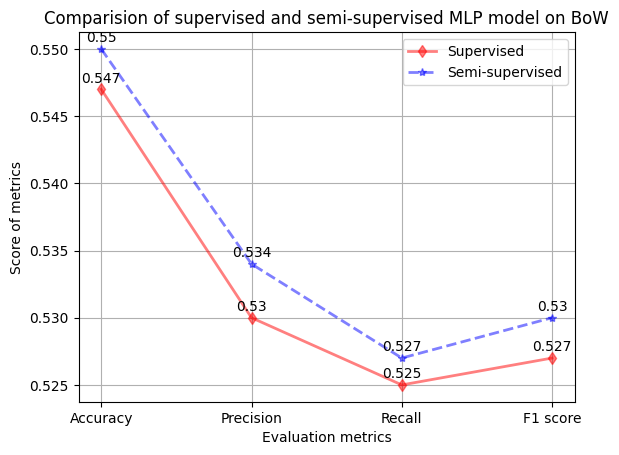

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt
plt.plot(figsize=(6,4))
x = ["Accuracy", "Precision", "Recall", "F1 score"]
# y1 = [0.675, 0.772, 0.637, 0.677] 
# y2 = [0.672, 0.773, 0.635, 0.674]
y1 = [0.547, 0.530, 0.525, 0.527] 
y2 = [0.550, 0.534, 0.527, 0.530] 

# plt.title("Comparision of supervised and semi-supervised RF model on All features")
plt.title("Comparision of supervised and semi-supervised MLP model on BoW")
plt.xlabel("Evaluation metrics")
plt.ylabel("Score of metrics")
line1 = plt.plot(x, y1, label='Supervised', marker='d', linewidth=2, color = 'r', alpha=0.5)
line1 = plt.plot(x, y2, label='Semi-supervised', marker='*', linestyle='--', linewidth=2, color = 'b', alpha=0.5)

for i, txt in enumerate(y1):
    plt.annotate(txt, (x[i], y1[i]), textcoords="offset points", xytext=(0,5), ha='center')
for i, txt in enumerate(y2):
    plt.annotate(txt, (x[i], y2[i]), textcoords="offset points", xytext=(0,5), ha='center')


plt.grid()
plt.legend()
plt.show()
